In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"/Users/lasyabuddharaju/Housing.csv")

In [3]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [34]:
df_bk=df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# data preprocessing


# 1.data cleaning


In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# duplicate values

In [6]:
df_dup=df[df.duplicated(keep='last')]
df_dup

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [7]:
df=df.drop_duplicates()

In [8]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

# handling noise data

In [9]:
df[df['price']<0]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


# handling outliers

In [10]:
from scipy import stats
z_scores = np.abs(stats.zscore(df['price']))
threshold = 3  # Adjust the threshold as needed
outlier_indices = np.where(z_scores > threshold)

In [11]:
outlier_indices

(array([0, 1, 2, 3, 4, 5]),)

In [12]:
df2 = df[z_scores<threshold]
df2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [13]:
df['area'].describe()

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64

<Axes: xlabel='area', ylabel='Count'>

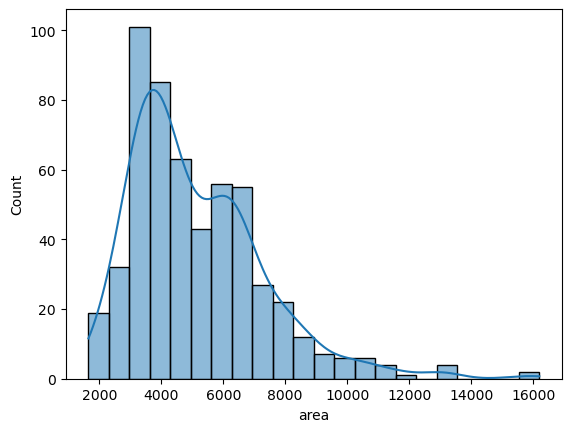

In [14]:
sns.histplot(df['area'],kde=True)

In [15]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['area'] > lower_bound) | (df['area'] < upper_bound)]
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# label encoder

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 59.6+ KB


In [17]:
df['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [18]:
df['mainroad']=df['mainroad'].replace({'yes':0,'no':1})

In [19]:
df['mainroad'].value_counts()

0    468
1     77
Name: mainroad, dtype: int64

In [20]:
df['guestroom'].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [21]:
df['guestroom']=df['guestroom'].replace({'yes':0,'no':1})

In [22]:
df['guestroom'].value_counts()

1    448
0     97
Name: guestroom, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
l_impute = LabelEncoder()
df['basement'] = l_impute.fit_transform(df['basement'])
df['hotwaterheating'] = l_impute.fit_transform(df['hotwaterheating'])
df['airconditioning'] = l_impute.fit_transform(df['airconditioning'])
df['prefarea'] = l_impute.fit_transform(df['prefarea'])
df['furnishingstatus'] = l_impute.fit_transform(df['furnishingstatus'])

In [24]:
df['basement'].value_counts()

0    354
1    191
Name: basement, dtype: int64

In [25]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,1,0,0,1,2,1,0
1,12250000,8960,4,4,4,0,1,0,0,1,3,0,0
2,12250000,9960,3,2,2,0,1,1,0,0,2,1,1
3,12215000,7500,4,2,2,0,1,1,0,1,3,1,0
4,11410000,7420,4,1,2,0,0,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,1,0,0,2,0,2
541,1767150,2400,3,1,1,1,1,0,0,0,0,0,1
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,2
543,1750000,2910,3,1,1,1,1,0,0,0,0,0,0


In [26]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Normalization

In [27]:
Indepvar=[]
for col in df.columns:
    if col !='price':
        Indepvar.append(col)
Targetvar ='price'

x= df[Indepvar]
y=df[Targetvar]


In [28]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,0,1,0,0,1,2,1,0
1,8960,4,4,4,0,1,0,0,1,3,0,0
2,9960,3,2,2,0,1,1,0,0,2,1,1
3,7500,4,2,2,0,1,1,0,1,3,1,0
4,7420,4,1,2,0,0,1,0,1,2,0,0


In [29]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [30]:
#split data into train and test (random sampling)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#displey the shape of train and test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((381, 12), (164, 12), (381,), (164,))

In [31]:
#scaling is done to bring all the varaibles on smiliar scale. 

from sklearn.preprocessing import MinMaxScaler

mmscaler=MinMaxScaler(feature_range=(0,1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# Linear Regression

In [32]:
# Build the multi regression model

from sklearn.linear_model import LinearRegression

# Create object for the model

ModelMLR = LinearRegression()

# Train the model with training data

ModelMLR.fit(x_train, y_train)

# Predict the model with test dataset

y_pred = ModelMLR.predict(x_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y_pred)*100,3), '%')
# Define the function to calculate the MAPE - Mean Absolute Percentage Error

def MAPE (y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Evaluation of MAPE

result = MAPE(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', round(result, 3), '%')
# Calculate Adjusted R squared values

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 1045425.178
Mean Squared Error (MSE): 1912145820710.956
Root Mean Squared Error (RMSE): 1382803.609
R2_score: 0.555975
Root Mean Squared Log Error (RMSLE): 14.14
Mean Absolute Percentage Error (MAPE): 24.689 %
Mean Absolute Percentage Error (MAPE): 24.689 %
Adj R Square:  0.545959


In [67]:
# Display the Final results

Results = pd.DataFrame({'price_A':y_test, 'price_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = df_bk.merge(Results, left_index=True, right_index=True)
#calculate the % of error

ResultsFinal['%Error']=round(((ResultsFinal['price_A']-ResultsFinal['price_P'])/ResultsFinal['price_A'])*100,3)
# Display 10 records randomly

ResultsFinal.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_A,price_P,%Error
486,2870000,6000,2,1,1,0,1,0,0,0,0,0,1,2870000,3.744678e+06,-30.477
124,5950000,6525,3,2,4,0,1,0,0,0,1,0,0,5950000,7.441763e+06,-25.072
527,2275000,1836,2,1,1,1,1,1,0,0,0,0,1,2275000,2.488113e+06,-9.368
22,8645000,8050,3,1,1,0,0,1,0,1,1,0,0,8645000,6.451094e+06,25.378
451,3150000,6750,2,1,1,0,1,0,0,0,0,0,1,3150000,3.984812e+06,-26.502


In [68]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR

# Create objects of Regression / Regressor models with default hyper-parameters

ModelMLR = LinearRegression()
ModelDCR = DecisionTreeRegressor()
ModelRFR = RandomForestRegressor()
ModelETR = ExtraTreesRegressor()
ModelKNN = KNeighborsRegressor(n_neighbors=5)
ModelBRR = BayesianRidge()
ModelSVR = SVR()

# Evalution matrix for all the algorithms

MM = [ModelMLR, ModelDCR, ModelRFR, ModelETR, ModelKNN, ModelBRR, ModelSVR]
#MM = [ModelMLR, ModelDCR, ModelRFR, ModelETR]

for models in MM:

    # Fit the model with train data

    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 1045425.178
Mean Squared Error (MSE): 1912145820710.956
Root Mean Squared Error (RMSE): 1382803.609
R2_score: 0.555975
Root Mean Squared Log Error (RMSLE): 14.14
Mean Absolute Percentage Error (MAPE): 24.69 %
Adj R Square:  0.545959
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1263224.695
Mean Squared Error (MSE): 3296446317820.122
Root Mean Squared Error (RMSE): 1815611.83
R2_score: 0.234522
Root Mean Squared Log Error (RMSLE): 14.412
Mean Absolute Percentage Error (MAPE): 28.9 %
Adj R Square:  0.217256
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1024109.769
Mean Squared Error (MSE): 1912477272429.19
Root Mean Squared Error (RMSE): 1382923.451
R2_score: 0.555898
Root Mean Sq

In [69]:
# Predict the values with DecisionTree algorithm

y_predF=ModelKNN.predict(x_test)

In [70]:
# Display the final results

Results=pd.DataFrame({'Price_A':y_test,'Price_P':y_predF})

# Merge two dataframes on index of both dataframes

ResultsFinal=df.merge(Results,left_index=True,right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Price_A,Price_P
284,4270000,7770,2,1,1,0,1,0,0,0,1,0,0,4270000,3540600.0
75,6650000,4260,4,2,2,0,1,0,1,0,0,0,1,6650000,3787000.0
19,8855000,6420,3,2,2,0,1,0,0,1,1,1,1,8855000,6907600.0
516,2450000,3240,2,1,1,1,0,0,0,0,1,0,2,2450000,2786000.0
367,3675000,3630,2,1,1,0,1,0,0,1,0,0,2,3675000,3348800.0


Mean Squared Error: 2.6235069981240873


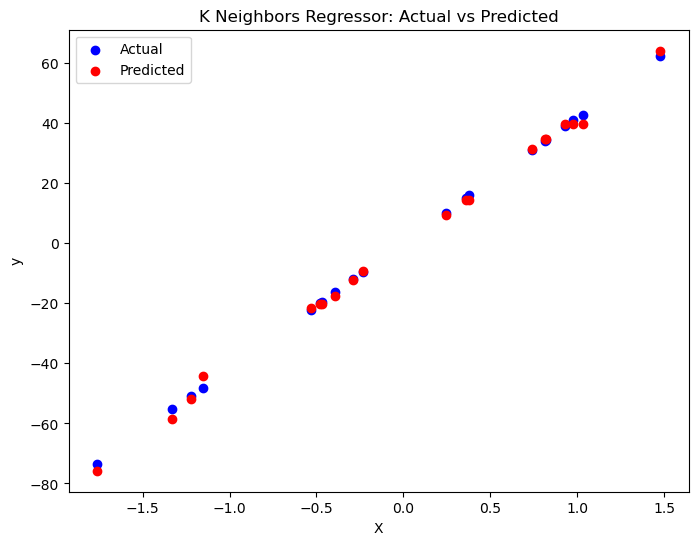

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate sample data (replace this with your actual data)
X, y = make_regression(n_samples=100, n_features=1, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the K Neighbors Regressor
k = 5  # Number of neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('K Neighbors Regressor: Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Mean Squared Error: 0.9762098261961978


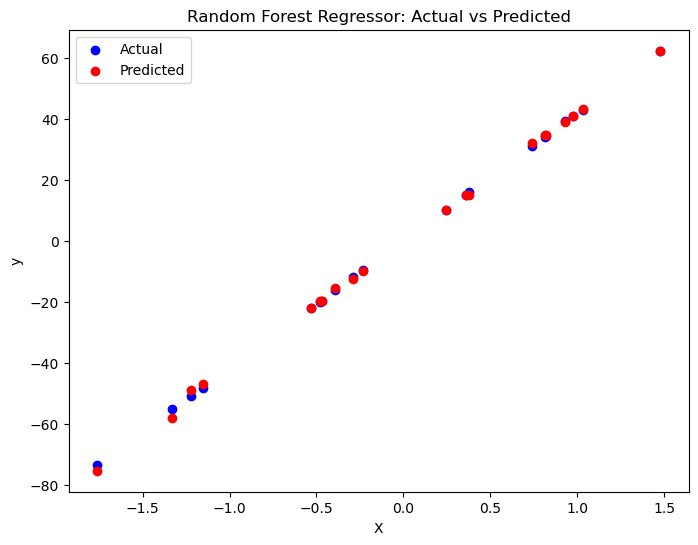

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Generate sample data (replace this with your actual data)
X, y = make_regression(n_samples=100, n_features=1, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
